Check how season length is being done now

In [1]:
import os
import warnings

import numpy as np

from rubin_scheduler.data import get_data_dir
from rubin_scheduler.scheduler.utils import ScheduledObservationArray
from rubin_scheduler.site_models import Almanac
from rubin_scheduler.utils import SURVEY_START_MJD, calc_season, ddf_locations
from rubin_scheduler.scheduler.surveys import generate_ddf_scheduled_obs

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
ack = generate_ddf_scheduled_obs()

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


In [3]:
data_file = os.path.join(get_data_dir(), "scheduler", "ddf_grid.npz")
ddf_data = np.load(data_file)
ddf_grid = ddf_data["ddf_grid"].copy()

In [4]:
ddf_grid.dtype

dtype([('mjd', '<f8'), ('sun_alt', '<f8'), ('sun_n18_rising_next', '<f8'), ('ELAISS1_airmass', '<f8'), ('ELAISS1_sky_g', '<f8'), ('ELAISS1_m5_g', '<f8'), ('XMM_LSS_airmass', '<f8'), ('XMM_LSS_sky_g', '<f8'), ('XMM_LSS_m5_g', '<f8'), ('ECDFS_airmass', '<f8'), ('ECDFS_sky_g', '<f8'), ('ECDFS_m5_g', '<f8'), ('COSMOS_airmass', '<f8'), ('COSMOS_sky_g', '<f8'), ('COSMOS_m5_g', '<f8'), ('EDFS_a_airmass', '<f8'), ('EDFS_a_sky_g', '<f8'), ('EDFS_a_m5_g', '<f8'), ('EDFS_b_airmass', '<f8'), ('EDFS_b_sky_g', '<f8'), ('EDFS_b_m5_g', '<f8')])

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


(61100.0, 61500.0)

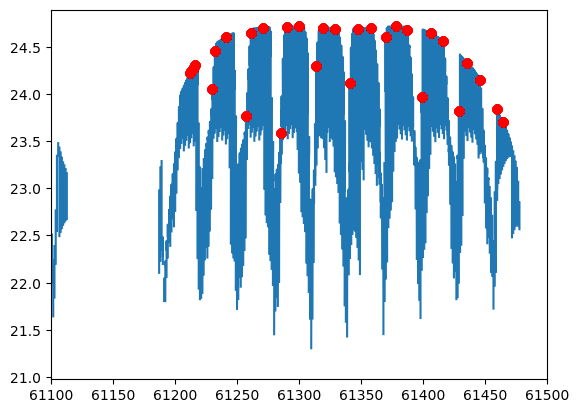

In [5]:
ack = generate_ddf_scheduled_obs(offseason_length=36.525)
ddf_name = "XMM_LSS"
good = np.where(ack["target_name"] == "DD:"+ddf_name)[0]
g_interp = np.interp(ack["mjd"][good], ddf_grid["mjd"], ddf_grid[ddf_name+"_m5_g"])
plt.plot(ddf_grid["mjd"], ddf_grid[ddf_name+"_m5_g"])
plt.plot(ack["mjd"][good], g_interp, 'ro')
plt.xlim([61100, 61500])

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


(61100.0, 61500.0)

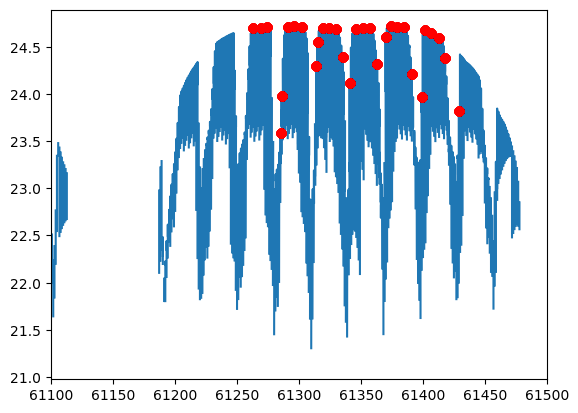

In [6]:
ack = generate_ddf_scheduled_obs(offseason_length=100)

good = np.where(ack["target_name"] == "DD:"+ddf_name)[0]
g_interp = np.interp(ack["mjd"][good], ddf_grid["mjd"], ddf_grid[ddf_name+"_m5_g"])
plt.plot(ddf_grid["mjd"], ddf_grid[ddf_name+"_m5_g"])
plt.plot(ack["mjd"][good], g_interp, 'ro')
plt.xlim([61100, 61500])

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


(61100.0, 61500.0)

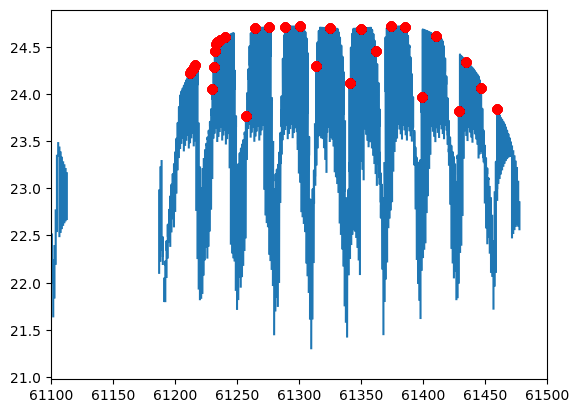

In [8]:
ack = generate_ddf_scheduled_obs(offseason_length=0)

good = np.where(ack["target_name"] == "DD:"+ddf_name)[0]
g_interp = np.interp(ack["mjd"][good], ddf_grid["mjd"], ddf_grid[ddf_name+"_m5_g"])
plt.plot(ddf_grid["mjd"], ddf_grid[ddf_name+"_m5_g"])
plt.plot(ack["mjd"][good], g_interp, 'ro')
plt.xlim([61100, 61500])

In [11]:
np.diff(np.unique(ack["mjd"][good]))

array([ 11.05208333,  16.89583333,   7.03125   ,  13.        ,
        11.        ,  12.98958333,  15.97916666,   8.01041666,
       129.38541664,   1.        ,   1.        ,   1.        ,
         1.        ,  14.        ,   1.        ,   0.98958333,
         1.01041667,   1.        ,   1.        ,   0.98958333,
         4.        ,  17.        ,   6.98958333,  11.96875   ,
        12.9375    ,  11.98958333,  12.83333333,  11.10416666,
        15.80208333,   9.125     ,  12.07291666,  11.86458333,
        11.97916666,  12.95833333,  12.02083333,  17.97916666,
         6.01041667,  11.98958333,  12.98958333, 125.3958333 ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,  17.        ,   5.98958333,
        11.97916666,  11.83333333,  12.10416666,  14.80208333,
        10.13541666,  16.78125   ,   7.14583333,  12.03125   ,
        11.89583333,  11.97916666,  14.9375    ,  10.02